In [1]:
import os
import json
import pandas

from bs4 import BeautifulSoup

In [2]:
TXT_DIR = 'data/txtfiles' 

In [3]:
with open('data/urls.json') as jf:
    files_and_urls = json.load(jf) 

In [4]:
files_and_urls

[{'filename': 'url0.txt',
  'url': 'https://www.bbc.co.uk/portuguese/brasil-53020785'},
 {'filename': 'url1.txt',
  'url': 'https://www.bbc.co.uk/portuguese/brasil-53027318'},
 {'filename': 'url2.txt',
  'url': 'https://www.bbc.co.uk/portuguese/brasil-51713943'},
 {'filename': 'url3.txt',
  'url': 'https://www.bbc.co.uk/portuguese/internacional-53008262'},
 {'filename': 'url4.txt',
  'url': 'https://www.bbc.co.uk/portuguese/internacional-53008266'},
 {'filename': 'url5.txt',
  'url': 'https://www.bbc.co.uk/portuguese/geral-53002475'},
 {'filename': 'url6.txt',
  'url': 'https://www.bbc.co.uk/portuguese/brasil-53000671'},
 {'filename': 'url7.txt',
  'url': 'https://www.bbc.co.uk/portuguese/brasil-53002123'},
 {'filename': 'url8.txt',
  'url': 'https://www.bbc.co.uk/portuguese/geral-52988154'},
 {'filename': 'url9.txt',
  'url': 'https://www.bbc.co.uk/portuguese/brasil-52856552'},
 {'filename': 'url10.txt',
  'url': 'https://www.bbc.co.uk/portuguese/internacional-52983258'},
 {'filename'

In [5]:
def parse_data(obj_list):
    data = []
    
    for obj in obj_list:
        with open(os.path.join(TXT_DIR, obj['filename']), 'r') as tf:
            html = tf.read()
        soup = BeautifulSoup(html, 'html.parser')
        data.append({
            'Url': obj['url'],
            'Title': soup.find('title').text,
            'Text': ' '.join([p.text for p in soup.find_all('p')])
        })

    return data    

In [6]:
data = parse_data(files_and_urls)

In [7]:
df = pandas.DataFrame(data)
df

,Url,Title,Text
0,https://www.bbc.co.uk/portuguese/brasil-53020785,Coronavírus: pandemia pode jogar até 14 milhõe...,Compartilhe este post com Email Facebook Mess...
1,https://www.bbc.co.uk/portuguese/brasil-53027318,Coronavírus: como funcionam as duas vacinas co...,Compartilhe este post com Email Facebook Mess...
2,https://www.bbc.co.uk/portuguese/brasil-51713943,Coronavírus: Brasil passa o Reino Unido e se t...,Compartilhe este post com Email Facebook Mess...
3,https://www.bbc.co.uk/portuguese/internacional...,Coronavírus na Índia: com lockdown 'insustentá...,Compartilhe este post com Email Facebook Mess...
4,https://www.bbc.co.uk/portuguese/internacional...,2ª onda do coronavírus? Irã vê aumento acelera...,Compartilhe este post com Email Facebook Mess...
...,...,...,...
345,https://www.bbc.co.uk/portuguese/internacional...,Coronavírus: 3 questões que os cientistas aind...,Há muitas questões que os cientistas ainda não...
346,https://www.bbc.co.uk/portuguese/internacional...,5 locais com estratégias bem-sucedidas de comb...,Compartilhe este post com Email Facebook Mess...
347,https://www.bbc.co.uk/portuguese/internacional...,‘Absurdo total’: cientistas condenam 'teoria' ...,Compartilhe este post com Email Facebook Mess...
348,https://www.bbc.co.uk/portuguese/geral-52114980,Coronavírus: as respostas para as perguntas ma...,Compartilhe este post com Email Facebook Mess...


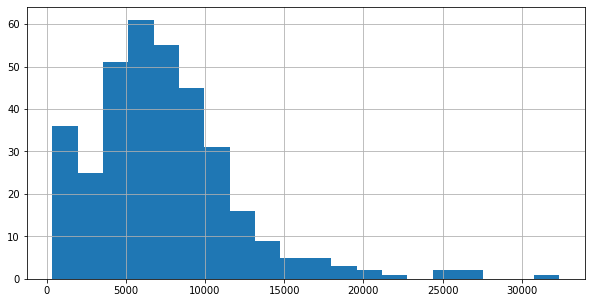

In [23]:
df['Text'].apply(lambda t: len(t)).hist(figsize=(10,5), bins=20)

In [24]:
df.iloc[19]

Url       https://www.bbc.co.uk/portuguese/brasil-52943574
Title    Coronavírus: Falta de empatia de Bolsonaro com...
Text      Compartilhe este post com Email Facebook Mess...
Name: 19, dtype: object

In [25]:
df.iloc[19].Text

' Compartilhe este post com Email Facebook Messenger Messenger Twitter WhatsApp LinkedIn Copiar este link Estes são links externos e abrirão numa nova janela Quando as mortes por coronavírus no Brasil passaram de 5 mil, no dia 28 de abril, o presidente Jair Bolsonaro comentou: "E daí? Lamento. Quer que eu faça o quê? Eu sou Messias, mas não faço milagre". Quanto passaram de 10 mil, no dia 11 de maio, Bolsonaro lamentou pela primeira vez as mortes: "Olha, eu lamento cada morte que ocorre a cada hora. Lamento. Agora, o que nós podemos fazer é tratar com devido zelo recurso público. Em vez de fazer a notinha de pesar, que eu acho válido, eu também sou pesaroso a essas questões… Tem que dar exemplo, gastar menos". Quando uma apoiadora pediu uma mensagem de conforto para as famílias em luto no Brasil, e o país superava 30 mil mortes, nesta semana, no dia 2 de junho, Bolsonaro respondeu: "A gente lamenta todos os mortos, mas é o destino de todo mundo".  Essa "impiedade" do presidente da Repú